In [262]:
import pandas as pd

In [279]:
df = pd.DataFrame.from_csv('new_dag_dataset_forscript-out.csv', sep=';', index_col=None)

In [280]:
# df = df.loc[df['year_of_birth'] < 1920]
# df = df.loc[df['year_of_birth'] > 1939]
# df = df.loc[(df['year_of_birth'] >= 1920) & (df['year_of_birth'] <= 1940)]
# df = df.loc[df['village'] == "chuni"]
# df = df.loc[df['female'] == 0]

In [281]:
villages = sorted(set(df['village']))
vill_dict = {name: i for i, name in enumerate(villages)}
village_lang = sorted(set(df['village_lang']))
vill_lang_dict = {name: i for i, name in enumerate(village_lang)}

In [282]:
col_list = ['village_lang_int','village_int','female','close_multiling','far_multiling','rus','year_of_birth','kum']
df['village_int'] = df['village'].apply(lambda x: vill_dict[x])
df['village_lang_int'] = df['village_lang'].apply(lambda x: vill_lang_dict[x])
for x in col_list:
    try:
        df[x] = df[x].apply(int)
    except:
        print('failure on {}'.format(x))

In [283]:
df = df[col_list]

In [284]:
df

,village_lang_int,village_int,female,close_multiling,far_multiling,rus,year_of_birth,kum
0,8,27,0,1,1,1,1885,0
1,8,27,0,1,1,1,1889,0
2,8,27,1,0,0,0,1890,0
3,8,27,0,1,0,0,1890,0
4,8,27,0,1,1,1,1890,0
5,8,27,1,0,0,0,1891,0
6,8,27,1,0,0,0,1893,0
7,8,27,0,1,1,1,1899,0
8,8,27,0,1,0,0,1900,0
9,8,27,0,1,1,1,1900,0


### Plots

In [285]:
def split_by_decade(df, n=10):
    result = {}
    start = min(df['year_of_birth']) - min(df['year_of_birth']) % n
    finish = max(df['year_of_birth']) - max(df['year_of_birth']) % n
    x = start
    while x + n <= finish:
        result[x] = df.query('{} < year_of_birth < {}'.format(x, x + n))
        x += n
    return result

In [286]:
# years = sorted(set(df['year_of_birth']))
# result = {}
# for x in years:
#    result[x] = df.query('{} == year_of_birth'.format(x))

In [287]:
decade_split = split_by_decade(df)

In [288]:
decade_split[1890]

,village_lang_int,village_int,female,close_multiling,far_multiling,rus,year_of_birth,kum
5,8,27,1,0,0,0,1891,0
6,8,27,1,0,0,0,1893,0
7,8,27,0,1,1,1,1899,0
55,2,6,1,0,0,0,1891,0
125,0,25,1,0,0,0,1896,0
126,0,25,1,0,3,0,1898,0
188,4,5,1,0,0,0,1892,0
189,4,5,1,0,2,0,1892,0
190,4,5,1,0,2,0,1892,0
191,4,5,0,1,2,1,1893,0


In [289]:
from collections import Counter

def df_to_plottable(df, field='rus'):
    female = df[df['female'] == 1]
    male = df[df['female'] == 0]
    female_counter = Counter(list(female[field]))
    male_counter = Counter(list(male[field]))
#     return male_counter, female_counter
    return counter_to_xy(male_counter), counter_to_xy(female_counter)

# для всех
def df_to_plottable1(df, field='kum'):
    female_counter = Counter(list(df[field]))
#     return male_counter, female_counter
    return counter_to_xy(female_counter)
    
def counter_to_xy(counter):
    xs = [0, 1, 2, 3, 4, 5, 6]
    ys = [(counter[x]/(sum(counter.values()) or 1)) for x in xs]
    return xs, ys

In [290]:
df_to_plottable(decade_split[1890])

(([0, 1, 2, 3, 4, 5, 6],
  [0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([0, 1, 2, 3, 4, 5, 6],
  [0.9019607843137255, 0.09803921568627451, 0.0, 0.0, 0.0, 0.0, 0.0]))

In [291]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("hls") # or "hls"
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline
# %pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = (8, 6)

In [292]:
def determine_zero(arr):
    for e, x in enumerate(arr):
        if all([y == 0 for y in arr[e:]]):
            return e
    return len(arr)

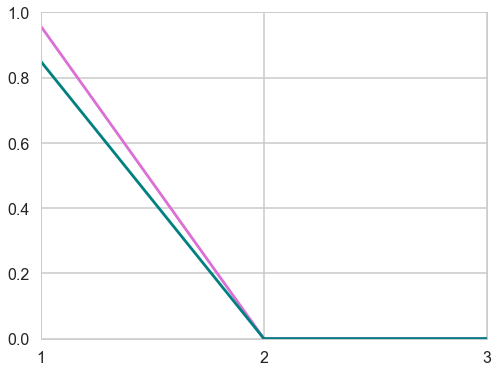

In [293]:
def determine_zero(arr):
    for e, x in enumerate(arr):
        if all([y == 0 for y in arr[e:]]):
            return e
    return len(arr)

# по декадам отрезает все что равно нулю + 1
for x in decade_split:
    pm, pf = df_to_plottable(decade_split[x])
    zero = max(determine_zero(pm[1]), determine_zero(pf[1]))
    if zero == 0:
        continue
    plt.clf()
    plt.plot(pm[0], pm[1], color='orchid')
    plt.plot(pf[0], pf[1], color='teal')
    plt.xticks([0,1,2,3,4,5])
    plt.xlim(1, zero + 1)
    plt.ylim(0, 1)
    plt.savefig('{}.png'.format(x))

In [294]:
import numpy as np

In [295]:
def makearray(zero):
    result = [1]
    while len(result) < zero + 1:
        result.append(result[-1] + 4)
    return np.array(result)

makearray(zero)

array([1, 5, 9])

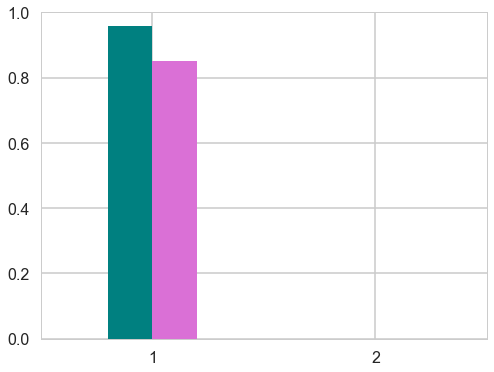

In [296]:
# по декадам отрезает все что равно нулю + 1
for x in decade_split:
    pm, pf = df_to_plottable(decade_split[x])
    pm = [pm[0][1:], pm[1][1:]]
    pf = [pf[0][1:], pf[1][1:]]
    plt.clf()
    plt.bar(np.arange(len(pm[0]))+0.15, pm[1], width=0.2, color="teal", label="male")
    plt.bar(np.arange(len(pf[0]))+0.35, pf[1], width=0.2, color="orchid", label="female")
    zero = max(determine_zero(pm[1]), determine_zero(pf[1]))
# для всего кроме русского
    plt.xlim(-0.25, zero+0.75)
    plt.xticks(0.25 * makearray(zero), np.arange(1, zero + 3))
    plt.ylim(0, 1)
# для русского
#     plt.xlim(-0.25, zero)
#     plt.xticks(0.25 * makearray(zero), ['no','yes'])
    plt.savefig('{}.png'.format(x))

In [297]:
from __future__ import division

def safediv(x, y):
    try:
        return x / y
    except ZeroDivisionError:
        return 0

[0.0, 0.0, 0.0, 0.25, 0.14285714285714285, 0.2222222222222222, 0.27586206896551724, 0.3333333333333333, 0.58, 0.6862745098039216, 0.819672131147541, 0.8724137931034482, 0.9318181818181818, 0.9585492227979274, 0.972972972972973, 0.9937888198757764, 0.9732142857142857, 0.9911504424778761]
[0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.09803921568627451, 0.13513513513513514, 0.05217391304347826, 0.3630573248407643, 0.4109090909090909, 0.7596899224806202, 0.8505747126436781, 0.9205607476635514, 0.9477124183006536, 0.96875, 0.9809523809523809]


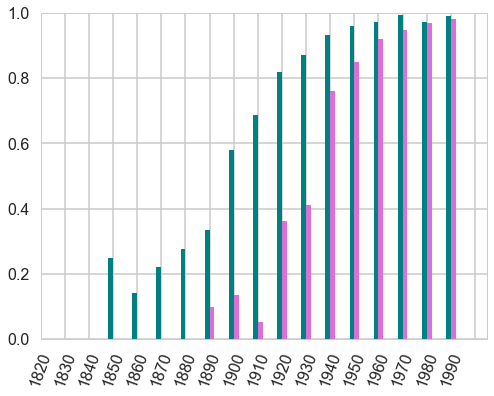

In [298]:
labels = sorted(decade_split)

# по декадам отрезает все что равно нулю + 1

pm = []
pf = []
for label in labels:
    df = decade_split[label]
    dfk = df[df['rus'] == 1]
    m = len(df[df['female'] == 0])
    f = len(df[df['female'] == 1])
    mk = len(dfk[dfk['female'] == 0])
    fk = len(dfk[dfk['female'] == 1])
    pm.append(safediv(mk, m))
    pf.append(safediv(fk, f))
print(pm)
print(pf)
plt.clf()
plt.bar(np.arange(len(pm))+0.15, pm, width=0.2, color="teal", label="male")
plt.bar(np.arange(len(pf))+0.35, pf, width=0.2, color="orchid", label="female")
# zero = max(pm[1].index(0), pf[1].index(0))
zero = len(pm)
# для всего кроме русского
plt.xlim(0.75, zero+0.75)
plt.xticks(0.25 * makearray(zero), labels, rotation=70)
# plt.yticks(np.arange(18))
plt.ylim(0, 1)
# для русского
#     plt.xlim(-0.25, zero)
#     plt.xticks(0.25 * makearray(zero), ['no','yes'])
plt.savefig('huilo.png')

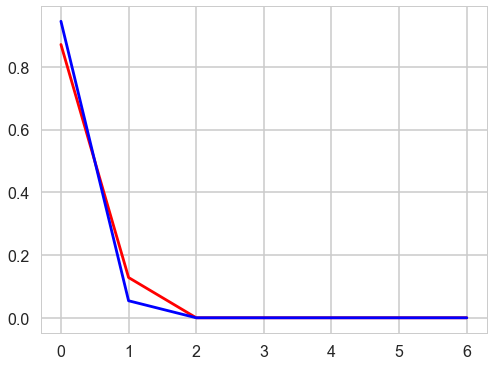

In [108]:
# по всему датафрейму
pm, pf = df_to_plottable(df)
plt.clf()
plt.plot(pm[0], pm[1], color='red')
plt.plot(pf[0], pf[1], color='blue')
plt.savefig('male_dargwa.png')

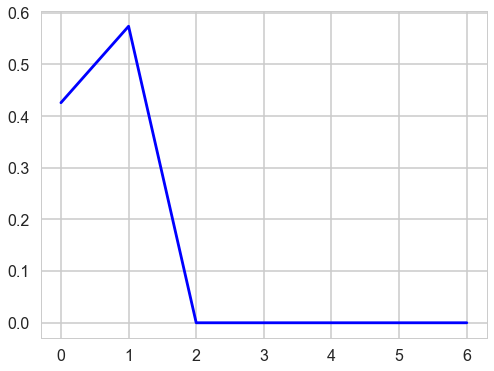

In [109]:
# без гендера
pf = df_to_plottable1(df)
plt.clf()
plt.plot(pf[0], pf[1], color='blue')
plt.savefig('pers_nogender_rus.png')

In [117]:
1992 - 1992 % 10

1990

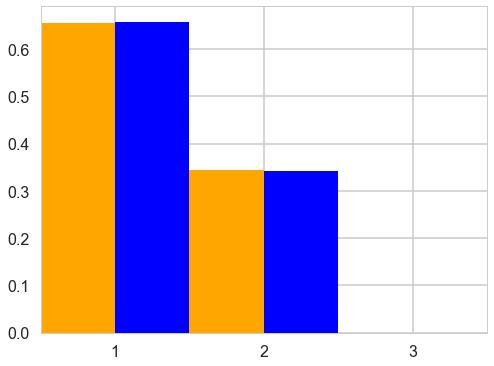

In [45]:
# plt.bar(np.arange(1,len(letternorm)),letternorm[1:], width=0.5, color="#FFA600", label="female")
# plt.bar(np.arange(1,len(bibletternorm))+0.5,bibletternorm[1:], width=0.5, color="b", label="male")
# plt.set_xticks(np.arange(len(bibletternorm)) + 0.5)
# по всему датафрейму
import numpy as np
pm, pf = df_to_plottable(df)
plt.bar(pm[0], pm[1], width=0.5, color="#FFA600", label="female")
plt.bar(np.arange(len(pf[0]))+0.5, pf[1], width=0.5, color="b", label="male")
zero = max(pm[1].index(0), pf[1].index(0))
plt.xlim(-0.25, zero+0.75)
plt.xticks(0.25 * makearray(zero), np.arange(1, zero + 2))
# plt.set_xticklabels()
plt.savefig('male_dargwa.png')

In [44]:
np.arange(1, zero + 2)

array([1, 2, 3])

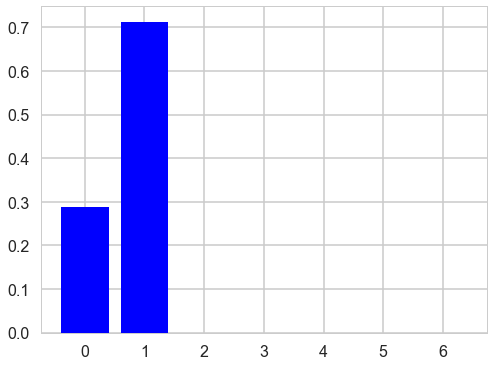

In [56]:
# без гендера
pf = df_to_plottable1(df)
plt.bar(pf[0], pf[1], color='blue')
plt.savefig('pers_nogender_rus.png')

### Classifiers

In [783]:
from sklearn.model_selection import train_test_split

def split_df(df):
    """returns x_train, x_test, y_train, y_test"""
    y = df['multiling']
    x = df[list(set(col_list) - {'multiling'})].as_matrix()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train, x_test, y_train, y_test

def split_by_year(df, year):
    return df[df['year_of_birth'] <= year], df[df['year_of_birth'] > year]

def check_quality(predictor, x_test, y_test):
    predicted = predictor.predict(x_test)
    y_test = np.array(y_test)
    return sum(int(round(predicted[i]) == round(y_test[i])) for i in range(len(y_test))) / len(y_test)

In [784]:
x_train, x_test, y_train, y_test = split_df(df)

In [785]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=700).fit(x_train, y_train)
check_quality(rfc, x_test, y_test)

# вся выборка — ближнее многоязычие — все факторы 0.81875 ('village_lang_int','village_int','female','close_multiling','far_multiling','rus','year_of_birth') 
# вся выборка — ближнее многоязычие — без 'village_lang_int','village_int' 0.655
# вся выборка — ближнее многоязычие — без 'female' 0.79
# вся выборка — ближнее многоязычие — без 'far_multiling' 0.8025
# вся выборка — ближнее многоязычие — без 'rus' 0.77875
# вся выборка — ближнее многоязычие — без 'year_of_birth' 0.765

# вся выборка — многоязычие без русского — 0.655 'village_lang_int','village_int','female','rus','year_of_birth','multiling_withoutrus'

# вся выборка — дальнее многоязычие — все факторы 0.795
# вся выборка — дальнее многоязычие — без 'village_lang_int','village_int' 0.76625
# вся выборка — дальнее многоязычие — без 'female' 0.825
# вся выборка — дальнее многоязычие — без 'close_multiling' 0.82125
# вся выборка — дальнее многоязычие — без 'rus' 
# вся выборка — дальнее многоязычие — без 'year_of_birth' 0.84125

# до 1920 — ближнее многоязычие — все факторы 0.813953488372093
# до 1920 — ближнее многоязычие — без 'village_lang_int','village_int' 0.4883720930232558
# до 1920 — ближнее многоязычие — без 'female' 0.7441860465116279
# до 1920 — ближнее многоязычие — без 'far_multiling' 0.7848837209302325
# до 1920 — ближнее многоязычие — без 'rus' 0.7383720930232558

# до 1920 — дальнее многоязычие — все факторы 0.7383720930232558 
# до 1920 — дальнее многоязычие — без 'village_lang_int','village_int' 0.7732558139534884
# до 1920 — дальнее многоязычие — без 'female' 0.7441860465116279
# до 1920 — дальнее многоязычие — без 'close_multiling' 0.7267441860465116
# до 1920 — дальнее многоязычие — без 'rus' 0.7267441860465116

# от 1920 по 1940 — ближнее многоязычие — все факторы 0.7668161434977578
# от 1920 по 1940 — ближнее многоязычие — без 'village_lang_int','village_int' 0.6053811659192825
# от 1920 по 1940 — ближнее многоязычие — без 'female' 0.8295964125560538
# от 1920 по 1940 — ближнее многоязычие — без 'far_multiling' 0.8116591928251121
# от 1920 по 1940 — ближнее многоязычие — без 'rus' 0.8116591928251121

# от 1920 по 1940 — дальнее многоязычие — все факторы 0.7488789237668162
# от 1920 по 1940 — дальнее многоязычие — без 'village_lang_int','village_int' 0.6816143497757847
# от 1920 по 1940 — дальнее многоязычие — без 'female' 0.8071748878923767
# от 1920 по 1940 — дальнее многоязычие — без 'close_multiling' 0.7488789237668162
# от 1920 по 1940 — дальнее многоязычие — без 'rus' 0.7757847533632287

# от 1940 — ближнее многоязычие — все факторы 0.8249400479616307
# от 1940 — ближнее многоязычие — без 'village_lang_int','village_int' 0.7817745803357314
# от 1940 — ближнее многоязычие — без 'female' 0.829736211031175
# от 1940 — ближнее многоязычие — без 'far_multiling' 0.8129496402877698
# от 1940 — ближнее многоязычие — без 'rus' 0.8249400479616307

# от 1940 — дальнее многоязычие — все факторы 0.8776978417266187
# от 1940 — дальнее многоязычие — без 'village_lang_int','village_int' 0.8776978417266187
# от 1940 — дальнее многоязычие — без 'female' 0.8705035971223022
# от 1940 — дальнее многоязычие — без 'close_multiling' 0.841726618705036
# от 1940 — дальнее многоязычие — без 'rus' 0.8920863309352518

# 1920 multiling_withoutrus все факторы 0.6337209302325582
# 1920 multiling_withoutrus без гендера 0.5988372093023255
# 1920-1940 multiling_withoutrus все факторы 0.7074340527577938
# 1920-1940 multiling_withoutrus без гендера 0.7266187050359713
# 1940 multiling_withoutrus все факторы 0.6547085201793722
# 1940 multiling_withoutrus без гендера 0.6591928251121076

# 1920 multiling все факторы 0.563953488372093
# 1920 multiling без гендера 0.3953488372093023
# 1920-1940 multiling все факторы 0.6882494004796164
# 1920-1940 multiling без гендера 0.6714628297362111
# 1940 multiling все факторы 0.4663677130044843
# 1940 multiling без гендера 0.452914798206278

0.452914798206278

In [786]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=700, verbose=True).fit(x_train, y_train)
check_quality(gbc, x_test, y_test)
# вся выборка — ближнее многоязычие — все факторы 0.82625 ('village_lang_int','village_int','female','close_multiling','far_multiling','rus','year_of_birth') 
# вся выборка — ближнее многоязычие — без 'village_lang_int','village_int' 0.66125
# вся выборка — ближнее многоязычие — без 'female' 0.82
# вся выборка — ближнее многоязычие — без 'far_multiling' 0.795
# вся выборка — ближнее многоязычие — без 'rus' 0.8275
# вся выборка — ближнее многоязычие — без 'year_of_birth' 0.8

# вся выборка — многоязычие без русского — 0.6775 'village_lang_int','village_int','female','rus','year_of_birth','multiling_withoutrus'

# вся выборка — дальнее многоязычие — все факторы 0.79125
# вся выборка — дальнее многоязычие — без 'village_lang_int','village_int' 0.7875
# вся выборка — дальнее многоязычие — без 'female' 0.82
# вся выборка — дальнее многоязычие — без 'close_multiling' 0.835
# вся выборка — дальнее многоязычие — без 'rus' 0.835
# вся выборка — дальнее многоязычие — без 'year_of_birth' 0.83875

# до 1920 — ближнее многоязычие — все факторы 0.7616279069767442
# до 1920 — ближнее многоязычие — без 'village_lang_int','village_int' 0.5290697674418605
# до 1920 — ближнее многоязычие — без 'female' 0.7383720930232558
# до 1920 — ближнее многоязычие — без 'far_multiling' 0.7848837209302325
# до 1920 — ближнее многоязычие — без 'rus' 0.6918604651162791

# до 1920 — дальнее многоязычие — все факторы 0.7558139534883721
# до 1920 — дальнее многоязычие — без 'village_lang_int','village_int' 0.7732558139534884
# до 1920 — дальнее многоязычие — без 'female' 0.7616279069767442
# до 1920 — дальнее многоязычие — без 'close_multiling' 0.7325581395348837
# до 1920 — дальнее многоязычие — без 'rus' 0.7558139534883721 

# от 1940 — ближнее многоязычие — все факторы 0.8129496402877698
# от 1940 — ближнее многоязычие — без 'village_lang_int','village_int' 0.7817745803357314
# от 1940 — ближнее многоязычие — без 'female' 0.8273381294964028
# от 1940 — ближнее многоязычие — без 'far_multiling' 0.8201438848920863
# от 1940 — ближнее многоязычие — без 'rus' 0.827338129496402

# от 1940 — дальнее многоязычие — все факторы 0.8848920863309353
# от 1940 — дальнее многоязычие — без 'village_lang_int','village_int' 0.8776978417266187
# от 1940 — дальнее многоязычие — без 'female' 0.8705035971223022
# от 1940 — дальнее многоязычие — без 'close_multiling' 0.8489208633093526
# от 1940 — дальнее многоязычие — без 'rus' 0.8872901678657075

# 1920 multiling_withoutrus все факторы 0.627906976744186
# 1920 multiling_withoutrus без гендера 0.6104651162790697
# 1920-1940 multiling_withoutrus все факторы 0.7074340527577938
# 1920-1940 multiling_withoutrus без гендера 0.7218225419664268
# 1940 multiling_withoutrus все факторы 0.6412556053811659
# 1940 multiling_withoutrus без гендера 0.6591928251121076

# 1920 multiling все факторы 0.5581395348837209
# 1920 multiling без гендера 0.4069767441860465
# 1920-1940 multiling все факторы 0.6906474820143885
# 1920-1940 multiling без гендера 0.6906474820143885
# 1940 multiling все факторы 0.4663677130044843
# 1940 multiling без гендера 0.452914798206278

      Iter       Train Loss   Remaining Time 
         1        1568.1880            5.05s
         2        1509.1332            4.71s
         3        1460.4706            4.52s
         4        1417.6199            4.49s
         5        1377.0911            4.50s
         6        1344.9901            4.46s
         7        1316.7395            4.35s
         8        1292.9344            4.33s
         9        1269.7523            4.24s
        10        1251.0650            4.16s
        20        1142.7735            3.88s
        30        1097.6431            3.82s
        40        1072.0795            3.73s
        50        1056.8986            3.61s
        60        1045.5899            3.45s
        70        1037.2818            3.34s
        80        1031.5783            3.25s
        90        1026.6993            3.21s
       100        1022.8045            3.15s
       200        1009.5487            2.53s
       300        1007.2101            2.03s
       40

0.452914798206278

In [514]:
from sklearn.svm import SVC

svc = SVC().fit(x_train, y_train)
check_quality(svc, x_test, y_test)

0.7757847533632287

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
check_quality(knc, x_test, y_test)

0.48788927335640137

In [17]:
from sklearn.linear_model import Perceptron

p = Perceptron().fit(x_train, y_train)
check_quality(p, x_test, y_test)

0.27335640138408307

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(x_train, y_train)
check_quality(dtc, x_test, y_test)

0.47923875432525953